In [62]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


Populating the interactive namespace from numpy and matplotlib


In [63]:
# byte-by-byte delimiters
colspecs = [(0, 4), (4, 14), (14, 25), (25, 31), (31, 37),
(37, 41), (41, 42), (42, 43), (43, 44), (44, 49),
(49, 51), (51, 60), (60, 62), (62, 64), (64, 68),
(68, 69), (69, 71), (71, 73), (73, 75), (75, 77),
(77, 79), (79, 83), (83, 84), (84, 86), (86, 88),
(88, 90), (90, 96), (96, 102), (102, 107), (107, 108),
(108, 109), (109, 114), (114, 115), (115, 120), (120, 121),
(121, 126), (126, 127), (127, 147), (147, 148), (148, 154),
(154, 160), (160, 161), (161, 166), (166, 170), (170, 174),
(174, 176), (176, 179), (179, 180), (180, 184), (184, 190),
(190, 194), (194, 196), (196, 197)]
catalog = pd.read_fwf("bsc5.dat", header = None, colspecs = colspecs,
names = ["HR",
"Name",
"DM",
"HD",
"SAO",
"FK5",
"IRflag",
"r_IRflag",
"Multiple",
"ADS",
"ADScomp",
"VarID",
"RAh1900",
"RAm1900",
"RAs1900",
"DE-1900",
"DEd1900",
"DEm1900",
"DEs1900",
"RAh",
"RAm",
"RAs",
"DE-",
"DEd",
"DEm",
"DEs",
"GLON",
"GLAT",
"Vmag",
"n_Vmag",
"u_Vmag",
"B-V",
"u_B-V",
"U-B",
"u_U-B",
"R-I",
"n_R-I",
"SpType",
"n_SpType",
"pmRA",
"pmDE",
"n_Parallax",
"Parallax",
"RadVel",
"n_RadVel",
"l_RotVel",
"RotVel",
"u_RotVel",
"Dmag",
"Sep",
"MultID",
"MultCnt",
"NoteFlag"])
catalog.to_csv("bsc5.csv")
df = pd.read_csv("bsc5.csv")

In [64]:
df.dropna(axis = 0, subset = ['Parallax'], inplace = True)
df.dropna(axis = 0, subset = ['Vmag'], inplace = True)
df.dropna(axis = 0, subset = ['B-V'], inplace = True)


In [65]:
df.shape

(3207, 54)

In [66]:
df_filtered = df[df['Parallax'] >= 0]

In [67]:
df_filtered.shape

(3048, 54)

In [68]:
df_filtered['Distance'] = 1/df_filtered['Parallax']

/var/folders/nn/n9ftdm353mn_z_w8794v5bzh0000gn/T/ipykernel_14096/3998535987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Distance'] = 1/df_filtered['Parallax']


In [69]:
df_filtered.head()

,Unnamed: 0,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,...,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag,Distance
2,2,3,33 Psc,BD-06 6357,28.0,128572.0,1002.0,I,NaN,NaN,...,SB1O,<,17.0,NaN,2.5,0.0,NaN,3.0,*,71.428571
4,4,5,NaN,BD+57 2865,123.0,21085.0,NaN,NaN,NaN,NaN,...,V,NaN,NaN,NaN,0.8,1.4,NaN,NaN,*,21.276596
5,5,6,NaN,CD-4914337,142.0,214963.0,NaN,NaN,NaN,W,...,SB,NaN,NaN,NaN,5.7,5.4,NaN,NaN,*,20.000000
7,7,8,NaN,BD+28 4704,166.0,73743.0,NaN,NaN,NaN,NaN,...,V,NaN,NaN,NaN,2.6,158.6,AB,4.0,*,14.925373
14,14,15,21Alp And,BD+28 4,358.0,73765.0,1.0,I,NaN,NaN,...,SBO,NaN,56.0,NaN,8.5,81.5,NaN,NaN,*,31.250000


In [70]:
df_filtered['Abs V'] = df_filtered['Vmag'] + 5 - (5*np.log10(df_filtered['Distance']))

/Users/sashi_ayyalasomayajula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/nn/n9ftdm353mn_z_w8794v5bzh0000gn/T/ipykernel_14096/979074650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Abs V'] = df_filtered['Vmag'] + 5 - (5*np.log10(df_filtered['Distance']))


In [71]:
df_filtered.head()

,Unnamed: 0,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,...,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag,Distance,Abs V
2,2,3,33 Psc,BD-06 6357,28.0,128572.0,1002.0,I,NaN,NaN,...,<,17.0,NaN,2.5,0.0,NaN,3.0,*,71.428571,0.340640
4,4,5,NaN,BD+57 2865,123.0,21085.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,1.4,NaN,NaN,*,21.276596,4.320489
5,5,6,NaN,CD-4914337,142.0,214963.0,NaN,NaN,NaN,W,...,NaN,NaN,NaN,5.7,5.4,NaN,NaN,*,20.000000,4.194850
7,7,8,NaN,BD+28 4704,166.0,73743.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.6,158.6,AB,4.0,*,14.925373,5.260374
14,14,15,21Alp And,BD+28 4,358.0,73765.0,1.0,I,NaN,NaN,...,NaN,56.0,NaN,8.5,81.5,NaN,NaN,*,31.250000,-0.414250


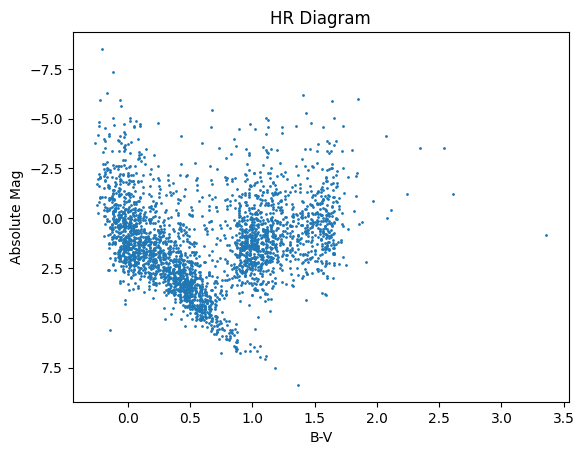

In [74]:
x = df_filtered['B-V'] 
y = df_filtered['Abs V']
fig = figure()
ax = fig.add_subplot(111)
ax.set_xlabel('B-V')
ax.set_ylabel('Absolute Mag')
ax.set_title('HR Diagram')
scatter(x,y,s=1) # marker size
gca().invert_yaxis()  # y-axis reversed
show()

In [ ]:
# From a visual analysis, I would say that about 63% of the stars are in the Main Sequence,
# 35% of stars are Red Giants, and 2% of the stars are white dwarfs.